**Machine Learning Homework**

Question 1

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

df1 = pd.read_csv("/Users/ashimalik/iCloud Drive (Archive)/Documents/MSBA/Quarter/WINTER/Machine Learning/WEEK 2/ASSIGNMENT 2/data_interactions_1.csv")

df1.head()

linReg1a = smf.ols(formula = 'sales ~ youtube + facebook + newspaper', data = df1)
LR1a = linReg1a.fit()
print(LR1a.summary())

linReg1b = smf.ols(formula = 'sales ~ youtube + facebook + newspaper + youtube:facebook + youtube:newspaper', data = df1)
LR1b = linReg1b.fit()
print(LR1b.summary())




                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 21 Jan 2022   Prob (F-statistic):           1.58e-96
Time:                        15:14:37   Log-Likelihood:                -422.65
No. Observations:                 200   AIC:                             853.3
Df Residuals:                     196   BIC:                             866.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.5267      0.374      9.422      0.0

Question 2

In [8]:
df2 = pd.read_csv("/Users/ashimalik/iCloud Drive (Archive)/Documents/MSBA/Quarter/WINTER/Machine Learning/WEEK 2/ASSIGNMENT 2/data_interactions_2.csv")

df2 = df2.rename(columns={'model year' : 'modelyear', 'car name' : 'carname'})

df2

df2.isnull().sum(axis = 0)

linReg2a = smf.ols(formula = 'mpg ~ cylinders + displacement + horsepower + weight + acceleration + modelyear + origin + carname', data = df2)
LR2a = linReg2a.fit()
print(LR2a.summary())

linReg2b = smf.ols(formula = 'mpg ~ cylinders + displacement + horsepower + weight + acceleration + modelyear + origin + carname + cylinders:horsepower:origin:carname + cylinders:horsepower:origin + cylinders:horsepower', data = df2)
LR2a = linReg2a.fit()
print(LR2a.summary())


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     15.57
Date:                Fri, 21 Jan 2022   Prob (F-statistic):           6.08e-16
Time:                        15:16:18   Log-Likelihood:                -382.22
No. Observations:                 398   AIC:                             1486.
Df Residuals:                      37   BIC:                             2926.
Df Model:                         360                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     15.57
Date:                Fri, 21 Jan 2022   Prob (F-statistic):           6.08e-16
Time:                        15:16:21   Log-Likelihood:                -382.22
No. Observations:                 398   AIC:                             1486.
Df Residuals:                      37   BIC:                             2926.
Df Model:                         360                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

Question 3

In [4]:
import pandas as pd

diabetes = pd.read_csv("/Users/ashimalik/iCloud Drive (Archive)/Documents/MSBA/Quarter/WINTER/Machine Learning/WEEK 2/ASSIGNMENT 2/diabetes.csv")
diabetes.head()

##Split the data set into x and y data

y = diabetes['Outcome']

X = diabetes.drop('Outcome', axis = 1)

##Standardize X

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns = list(X))
X

##Split the data set into training data and test data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

##Create the model

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

##Train the model and create predictions

logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

##Calculate performance metrics

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

##Generate a confusion matrix

from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##Visualizing Confusion Matrix using Heatmap

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

##Confusion Matrix Evaluation Metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

##ROC Curve


y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/mac/Desktop/452 - Machine Learning/Assignment 2/diabetes.csv'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328 

NameError: name 'sm' is not defined

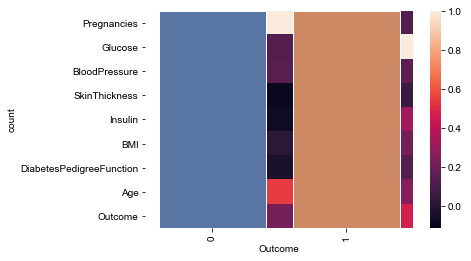

In [11]:
import numpy as np

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import joblib
np.random.seed(100)

diabetes = pd.read_csv("/Users/ashimalik/iCloud Drive (Archive)/Documents/MSBA/Quarter/WINTER/Machine Learning/WEEK 2/ASSIGNMENT 2/diabetes.csv")
diabetes.head()

diabetes.info() 

diabetes.isna().sum()

corr = diabetes.corr()
print(corr)
sns.heatmap(corr, 
         xticklabels=corr.columns, 
         yticklabels=corr.columns)

sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Outcome", data=diabetes)

X = diabetes[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]


Y = diabetes[['Outcome']]

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

log_reg = sm.Logit(Y_train, X_train).fit()
print(log_reg.summary())

Y_pred = log_reg.predict(X_test)
print(Y_pred)

Y_pred = (Y_pred > 0.5).astype('int64')
print(Y_pred)

Y_test

Y_pred

##Generate a confusion matrix

from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)
cnf_matrix

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##Visualizing Confusion Matrix using Heatmap

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
##Create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

##Confusion Matrix Evaluation Metrics

print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
print("Precision:",metrics.precision_score(Y_test, Y_pred))
print("Recall:",metrics.recall_score(Y_test, Y_pred))

##ROC Curve

y_pred_proba = log_reg.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()


def forward_regression(X, y,
                       threshold_in=0.05, 
                       threshold_out = 0.05, 
                       verbose=True):
    
    included = [] # list of variables after each forward step
    columns = list(X.columns.values)
    
    while True:
        flag=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        
        # Running an auxillary logistic  regression for every column in the excluded list
        for new_column in excluded:
            x_temp = X[included + [new_column]]
            model = sm.Logit(y, sm.add_constant(pd.DataFrame(x_temp))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        
            print(new_pval)
        
        best_pval = new_pval.min()
        
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            feature_to_add = columns[best_feature]
            print(feature_to_add)
            included.append(feature_to_add)
            columns = list(set(columns) - set(included))
            flag=True
            if verbose:
                print('Add', str(feature_to_add), ' with p-value ', str(best_pval))

        if not flag:
            break

    return included

new_var = forward_regression(X, Y)

new_var

list(diabetes.columns.values)

new_var

X_train_new = X_train[new_var]
X_test_new = X_test[new_var]

log_rex_new = sm.Logit(Y_train,X_train_new).fit()
print(log_rex_new.summary())


Y_pred = (log_rex_new.predict(X_test_new) > 0.5).astype('int64')

print(Y_pred)

##Generate a confusion matrix

from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)
cnf_matrix

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##Visualizing Confusion Matrix using Heatmap

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

##Confusion Matrix Evaluation Metrics

print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
print("Precision:",metrics.precision_score(Y_test, Y_pred))
print("Recall:",metrics.recall_score(Y_test, Y_pred))

##ROC Curve


y_pred_proba = log_reg.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()